In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
cd /content/drive/MyDrive/recycling waste

/content/drive/MyDrive/recycling waste


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.15.0


In [ ]:

import cv2,os
data_path='/content/drive/MyDrive/recycling waste/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'glass': 0, 'light blubs': 1, 'organic': 2, 'clothes': 3, 'batteries': 4, 'paper': 5, 'e-waste': 6, 'plastic': 7, 'metal': 8}
['glass', 'light blubs', 'organic', 'clothes', 'batteries', 'paper', 'e-waste', 'plastic', 'metal']
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass t

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import to_categorical
new_target=to_categorical(target)

In [ ]:
new_target.shape

(1298, 9)

In [ ]:
data.shape

(1298, 100, 100, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(9,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 activation_4 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_5 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 100)       0         
 g2D)                                                 

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
test_target.shape

(130, 9)

In [ ]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 115s 4s/step - loss: 2.1136 - accuracy: 0.2516 - val_loss: 2.0713 - val_accuracy: 0.2778
Epoch 2/10
30/30 [==============================] - 106s 4s/step - loss: 2.1057 - accuracy: 0.2516 - val_loss: 2.0668 - val_accuracy: 0.2778
Epoch 3/10
30/30 [==============================] - 111s 4s/step - loss: 2.1036 - accuracy: 0.2516 - val_loss: 2.0739 - val_accuracy: 0.2778
Epoch 4/10
30/30 [==============================] - 109s 4s/step - loss: 2.1061 - accuracy: 0.2516 - val_loss: 2.0727 - val_accuracy: 0.2778
Epoch 5/10
30/30 [==============================] - 109s 4s/step - loss: 2.1030 - accuracy: 0.2516 - val_loss: 2.0567 - val_accuracy: 0.2778
Epoch 6/10
30/30 [==============================] - 102s 3s/step - loss: 2.0988 - accuracy: 0.2516 - val_loss: 2.0551 - val_accuracy: 0.2778
Epoch 7/10
30/30 [==============================] - 114s 4s/step - loss: 2.0606 - accuracy: 0.2495 - val_loss: 2.0185 - val_accuracy: 0.2991
Epoch 8/10
30

In [ ]:
model.save('new_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


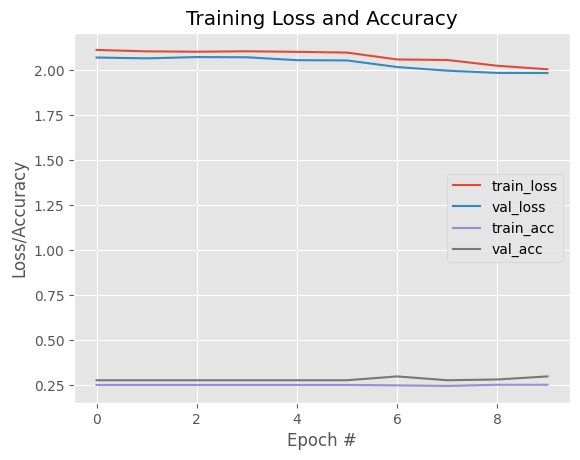

In [ ]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")